In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("loan_approval_data.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_ID        950 non-null    float64
 1   Applicant_Income    950 non-null    float64
 2   Coapplicant_Income  950 non-null    float64
 3   Employment_Status   950 non-null    object 
 4   Age                 950 non-null    float64
 5   Marital_Status      950 non-null    object 
 6   Dependents          950 non-null    float64
 7   Credit_Score        950 non-null    float64
 8   Existing_Loans      950 non-null    float64
 9   DTI_Ratio           950 non-null    float64
 10  Savings             950 non-null    float64
 11  Collateral_Value    950 non-null    float64
 12  Loan_Amount         950 non-null    float64
 13  Loan_Term           950 non-null    float64
 14  Loan_Purpose        950 non-null    object 
 15  Property_Area       950 non-null    object 
 16  Educati

### Handling Missing Values

In [6]:
numerical_cols = df.select_dtypes(include = ["number"]).columns
categorical_cols = df.select_dtypes(include = ["object"]).columns

In [8]:
from sklearn.impute import SimpleImputer

num_imp = SimpleImputer(strategy = "mean")
df[numerical_cols] = num_imp.fit_transform(df[numerical_cols])

cat_imp = SimpleImputer(strategy = "most_frequent")
df[categorical_cols] = cat_imp.fit_transform(df[categorical_cols])

In [10]:
df.head()
df.isnull().sum()

Applicant_ID          0
Applicant_Income      0
Coapplicant_Income    0
Employment_Status     0
Age                   0
Marital_Status        0
Dependents            0
Credit_Score          0
Existing_Loans        0
DTI_Ratio             0
Savings               0
Collateral_Value      0
Loan_Amount           0
Loan_Term             0
Loan_Purpose          0
Property_Area         0
Education_Level       0
Gender                0
Employer_Category     0
Loan_Approved         0
dtype: int64

### EDA

([<matplotlib.patches.Wedge at 0x19c9e22ac10>,
 [Text(-0.6521425375337495, 0.8858386482531919, 'no'),
  Text(0.6521428261765839, -0.8858384357581341, 'yes')],
 [Text(-0.3557141113820451, 0.48318471722901374, '70.2%'),
  Text(0.3557142688235912, -0.4831846013226186, '29.8%')])

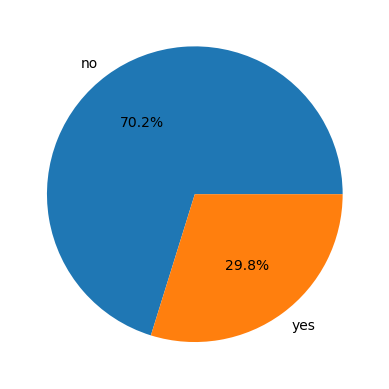

In [22]:
# vizualization of labels
classes_cnt = [np.sum(df["Loan_Approved"] == "No"), np.sum(df["Loan_Approved"] == "Yes")]
plt.pie(classes_cnt, labels = ["no", "yes"], autopct = "%1.1f%%")

This is generally the case in loan approvals that the number of loans approved are significantly lower.

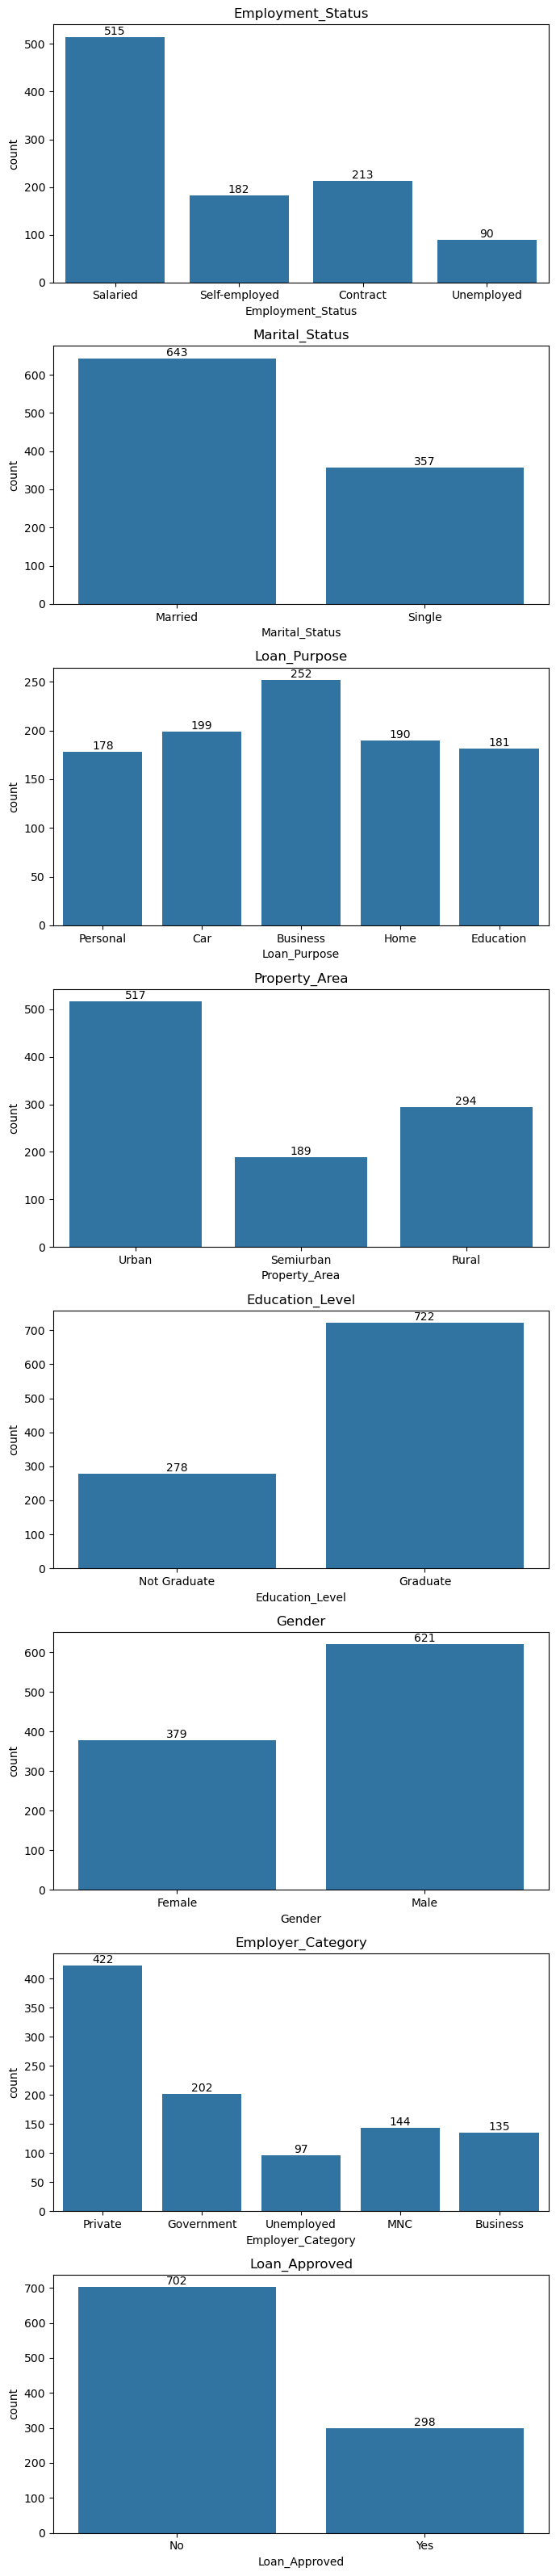

In [47]:
# now let's vizualize the imbalance in categorical features
import seaborn as sns

fig, axes = plt.subplots(len(categorical_cols), 1, figsize=(7, 4 * len(categorical_cols)))

for i, col in enumerate(categorical_cols):
    sns.countplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x')
    axes[i].bar_label(axes[i].containers[0])

plt.tight_layout()
plt.show()



    #print(df[col].value_counts().index, df[col].value_counts().index)

In [54]:
numerical_cols = numerical_cols.drop("Applicant_ID")

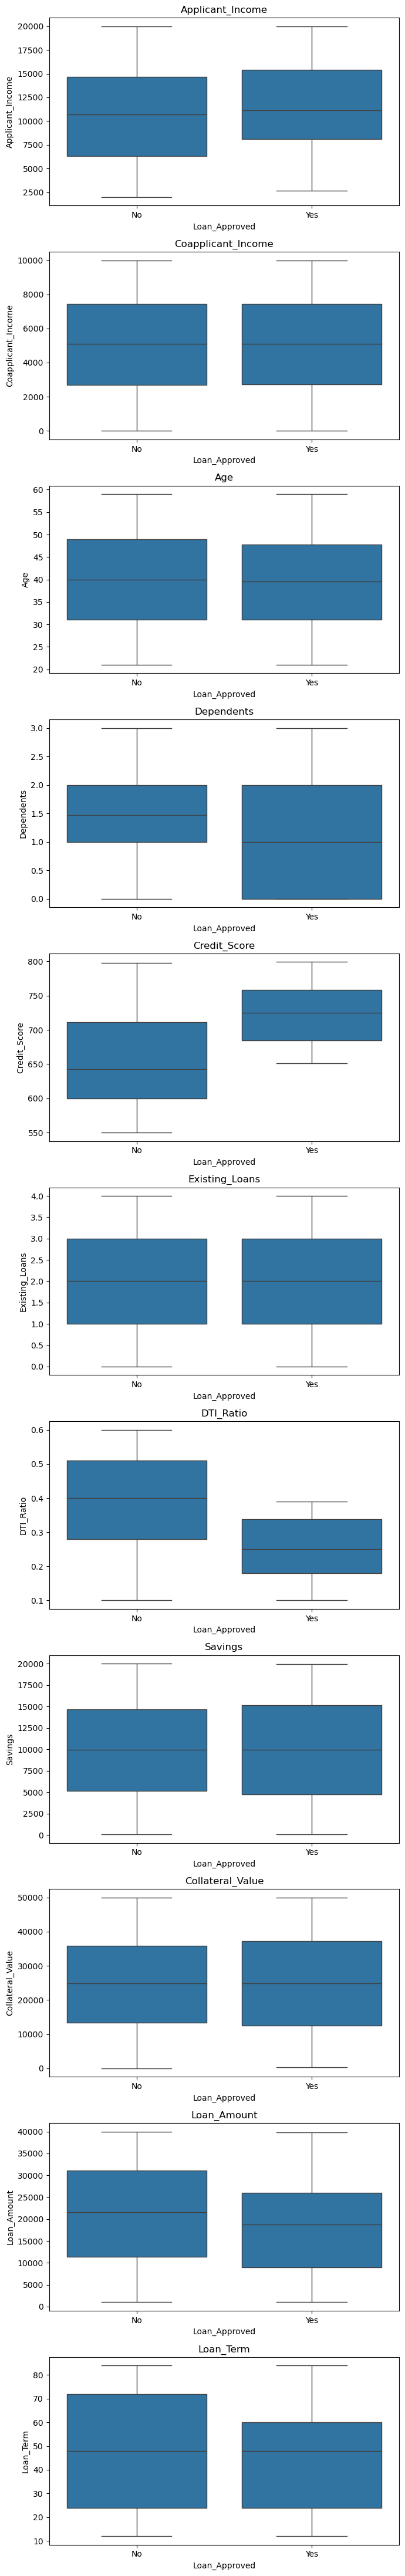

In [62]:
# let's vizualize outliers in numeric columns
fig, axes = plt.subplots(len(numerical_cols), 1, figsize=(7, 4*len(numerical_cols)))
for i, col in enumerate(numerical_cols):
    sns.boxplot(data = df, x = "Loan_Approved", y = col, ax = axes[i])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x')

plt.tight_layout()
plt.show()

There are no outliers.

<Axes: xlabel='Credit_Score', ylabel='Count'>

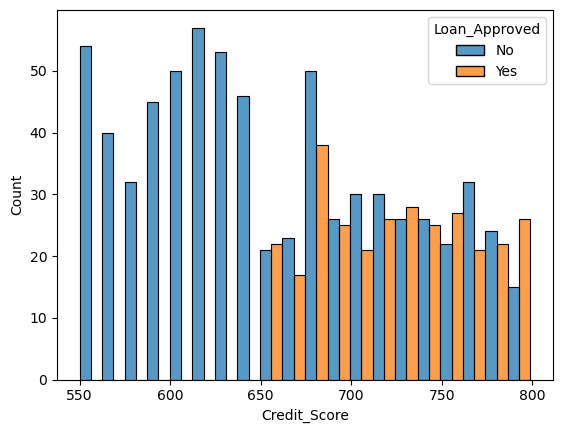

In [64]:
# let's analyze the correlation of some important features with the target label

sns.histplot(data = df,
             x = 'Credit_Score',
             hue = 'Loan_Approved',
             bins = 20,
             multiple = 'dodge'
            )

We can see that the loans are not approved if credit score is less than 650.

<Axes: xlabel='Applicant_Income', ylabel='Count'>

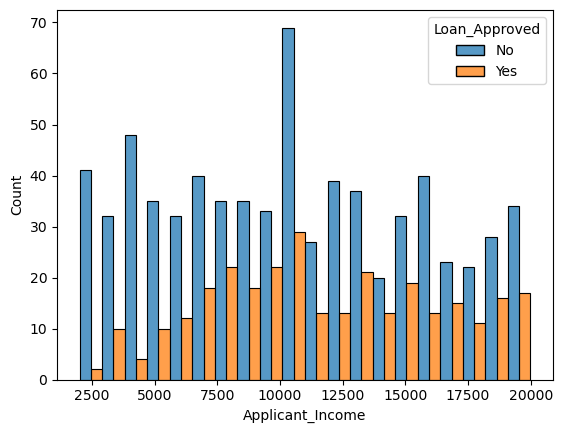

In [66]:
sns.histplot(data = df,
             x = 'Applicant_Income',
             hue = 'Loan_Approved',
             bins = 20,
             multiple = 'dodge'
            )

Higher income has lead to higher approvals but has no clear distinction like credit score.

In [69]:
# drop applicant id from the data
df = df.drop(columns = ["Applicant_ID"])

In [79]:
df.head()

,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,1,Female,Private,0
1,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,0,Male,Private,0
2,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,0,Female,Government,1
3,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,0,Female,Government,0
4,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,0,Male,Private,1


### Encoding
- LabelEncoder: For ordinal data
- OneHotEncoder: For nominal data

In [71]:
categorical_cols

Index(['Employment_Status', 'Marital_Status', 'Loan_Purpose', 'Property_Area',
       'Education_Level', 'Gender', 'Employer_Category', 'Loan_Approved'],
      dtype='object')

In [72]:
ordinal_cols = ["Education_Level", "Loan_Approved"] # we would prefer graduates over non-graduates for loan and can encode target label
nominal_cols = categorical_cols.drop(ordinal_cols)

In [74]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
for col in ordinal_cols:
    df[col] = le.fit_transform(df[col])

,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,1,Female,Private,0
1,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,0,Male,Private,0
2,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,0,Female,Government,1
3,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,0,Female,Government,0
4,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,0,Male,Private,1


In [84]:
ohe = OneHotEncoder(drop = 'first', sparse_output = False, handle_unknown = "ignore") # drop the first column of the encoded columns
encoded = ohe.fit_transform(df[nominal_cols])

encoded_df = pd.DataFrame(encoded, columns = ohe.get_feature_names_out(nominal_cols), index = df.index)

df = pd.concat([df.drop(columns = nominal_cols), encoded_df], axis = 1)
df.head()


,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,...,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed
0,17795.0,1387.0,51.0,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2860.0,2679.0,46.0,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,7390.0,2106.0,25.0,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,13964.0,8173.0,40.0,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,13284.0,4223.0,31.0,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


### Correlation

In [86]:
num_cols = df.select_dtypes(include = "number")

corr_matrix = num_cols.corr()

In [88]:
corr_matrix["Loan_Approved"].sort_values(ascending = False)

Loan_Approved                      1.000000
Credit_Score                       0.451175
Applicant_Income                   0.119796
Employer_Category_MNC              0.069049
Loan_Purpose_Personal              0.034043
Marital_Status_Single              0.030182
Property_Area_Urban                0.025963
Collateral_Value                   0.021868
Coapplicant_Income                 0.004230
Loan_Purpose_Home                  0.002118
Employment_Status_Self-employed   -0.001337
Employer_Category_Private         -0.003347
Property_Area_Semiurban           -0.012967
Savings                           -0.013437
Loan_Purpose_Education            -0.016684
Employer_Category_Unemployed      -0.021468
Age                               -0.022343
Dependents                        -0.023811
Existing_Loans                    -0.034794
Employer_Category_Government      -0.039187
Employment_Status_Salaried        -0.041428
Employment_Status_Unemployed      -0.044464
Education_Level                 

Loan Approved is highly correlated with credit score and applicant income positively whereas with DTI ratio and loan amount negatively.

<Axes: >

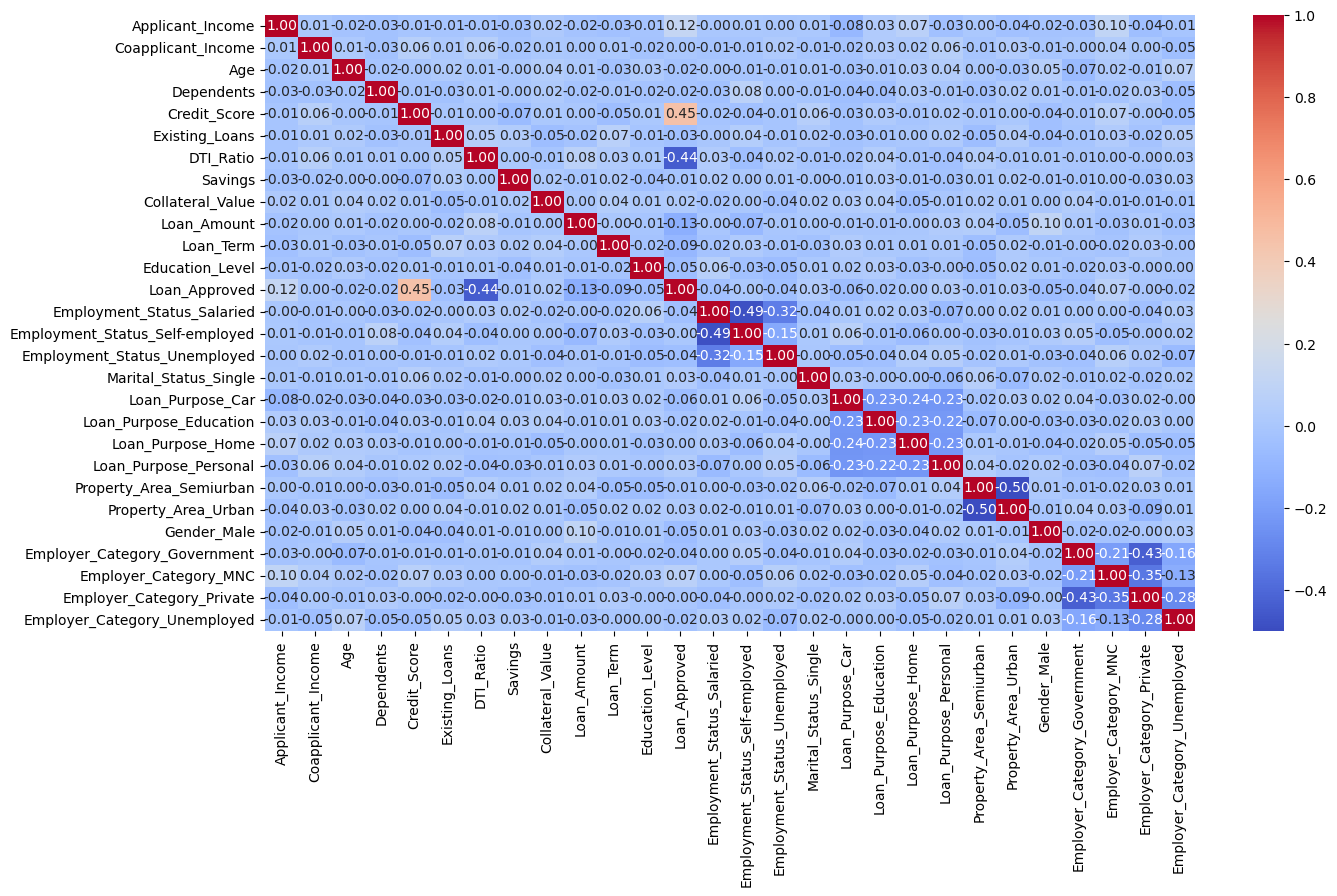

In [97]:
plt.figure(figsize = (15, 8))
sns.heatmap(
    corr_matrix,
    annot = True,
    fmt = ".2f",
    cmap = "coolwarm"
)

### Train-Test Split + Feature Engineering

In [99]:
from sklearn.model_selection import train_test_split

X = df.drop("Loan_Approved", axis = 1)
y = df["Loan_Approved"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

In [101]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Traing and Evaluation
We will use three models - Logistic Regression, knn and Naive Bayes. For our problem, keeping FP to minimum is important, so we will focus on precision.

In [103]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score

In [105]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_test_scaled)

print("Logistic Regression")
print("Precision = ", precision_score(y_test, y_pred))
print("Recall = ", recall_score(y_test, y_pred))
print("F1 score = ", f1_score(y_test, y_pred))
print("Accuracy = ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

Logistic Regression
Precision =  0.7413793103448276
Recall =  0.7166666666666667
F1 score =  0.7288135593220338
Accuracy =  0.84
Confusion Matrix: 
 [[125  15]
 [ 17  43]]


In [113]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 7)

knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

print("Logistic Regression")
print("Precision = ", precision_score(y_test, y_pred))
print("Recall = ", recall_score(y_test, y_pred))
print("F1 score = ", f1_score(y_test, y_pred))
print("Accuracy = ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

Logistic Regression
Precision =  0.8378378378378378
Recall =  0.5166666666666667
F1 score =  0.6391752577319587
Accuracy =  0.825
Confusion Matrix: 
 [[134   6]
 [ 29  31]]


In [114]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train_scaled, y_train)

y_pred = gnb.predict(X_test_scaled)

print("Logistic Regression")
print("Precision = ", precision_score(y_test, y_pred))
print("Recall = ", recall_score(y_test, y_pred))
print("F1 score = ", f1_score(y_test, y_pred))
print("Accuracy = ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

Logistic Regression
Precision =  0.8163265306122449
Recall =  0.6666666666666666
F1 score =  0.7339449541284404
Accuracy =  0.855
Confusion Matrix: 
 [[131   9]
 [ 20  40]]


### Best model on the basis of precision : KNN with K = 7

### Feature Engineering
As we had seen in the correlation heatmap that Credit score, DTI ratio had high correlation as well as there was correlation with applicant income and loan amount, we will try to amplify the effect of those features by squaring those features.

In [115]:
df['Credit_Score_Sq'] = df['Credit_Score']**2
df['DTI_Ratio_Sq'] = df['DTI_Ratio']**2

X = df.drop(columns = ['Loan_Approved', 'Credit_Score', 'DTI_Ratio'])
y = df['Loan_Approved']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [116]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_test_scaled)

print("Logistic Regression")
print("Precision = ", precision_score(y_test, y_pred))
print("Recall = ", recall_score(y_test, y_pred))
print("F1 score = ", f1_score(y_test, y_pred))
print("Accuracy = ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

Logistic Regression
Precision =  0.7777777777777778
Recall =  0.7
F1 score =  0.7368421052631579
Accuracy =  0.85
Confusion Matrix: 
 [[128  12]
 [ 18  42]]


Logistic Regression: Precision improved, overall improved

In [125]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 11)

knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

print("Logistic Regression")
print("Precision = ", precision_score(y_test, y_pred))
print("Recall = ", recall_score(y_test, y_pred))
print("F1 score = ", f1_score(y_test, y_pred))
print("Accuracy = ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

Logistic Regression
Precision =  0.631578947368421
Recall =  0.4
F1 score =  0.4897959183673469
Accuracy =  0.75
Confusion Matrix: 
 [[126  14]
 [ 36  24]]


KNN: Precision worsened, overall worsened

In [127]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train_scaled, y_train)

y_pred = gnb.predict(X_test_scaled)

print("Logistic Regression")
print("Precision = ", precision_score(y_test, y_pred))
print("Recall = ", recall_score(y_test, y_pred))
print("F1 score = ", f1_score(y_test, y_pred))
print("Accuracy = ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

Logistic Regression
Precision =  0.84
Recall =  0.7
F1 score =  0.7636363636363637
Accuracy =  0.87
Confusion Matrix: 
 [[132   8]
 [ 18  42]]


Gaussian Naive Bayes: Precision improved, overall improved

### Final Model: Gaussian Naive Bayes